In [1]:
from ProjectModel_Ingredients import util
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Generate random dataset
___

In [2]:
dat = util._generate_binary_samples(1000, 10, seed=True, seed_val=42)
dat_df = pd.DataFrame(dat)

## Correlation matrix of the dataset
___

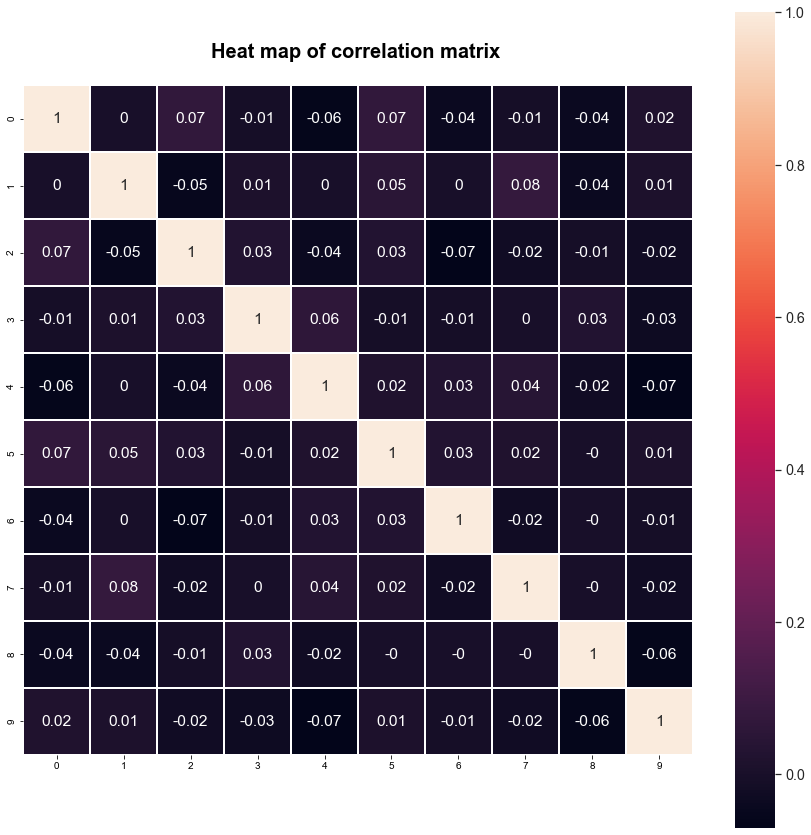

In [3]:
util._plot_correlation(dat_df)

## Bartlett and KMO tests

In [4]:
util._bartlett(dat_df)

Bartlett test results: 
statistics: 67.53723247100172
p-value: 0.003306691032952778
Null hypothesis rejected. Statistical significance demonstrated for collinearity.


In [5]:
util._kmo(dat_df)

KMO test results: 
statistics: 0.51
Sampling is sufficient for factor analysis.


## Standardize dataset
___

In [6]:
dat_std = StandardScaler().fit_transform(dat_df)

## Perform PCA
___

In [7]:
n_components = len(dat_std[0, :])
pca = PCA(n_components).fit(dat_std)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
dat_transformed = pca.transform(dat_std)

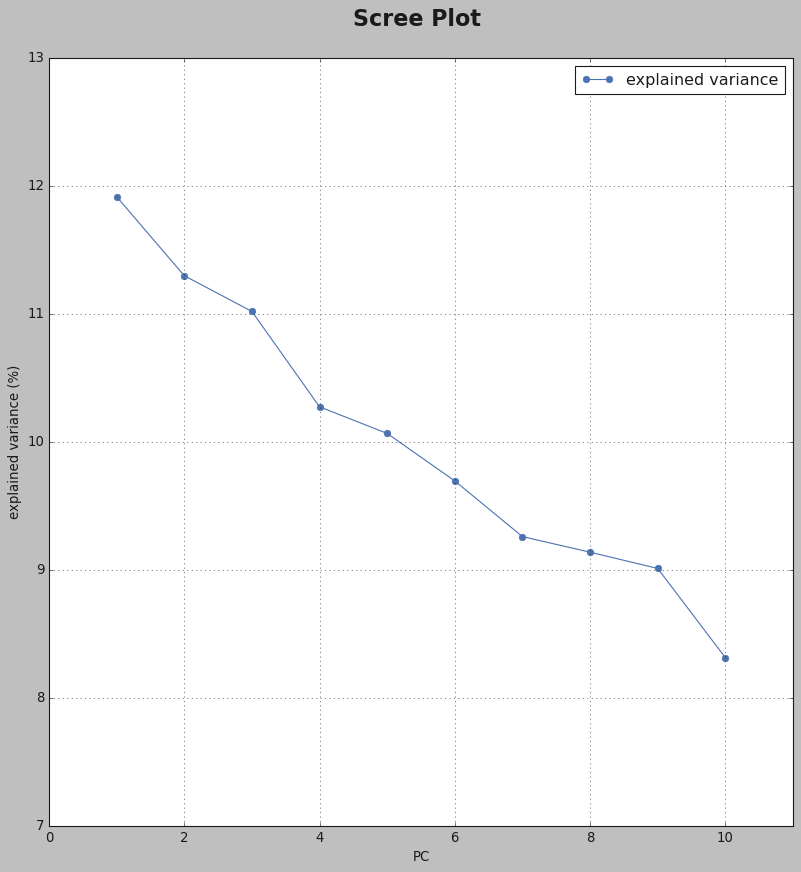

In [8]:
# get scree plot
util._plot_scree(eigenvalues)

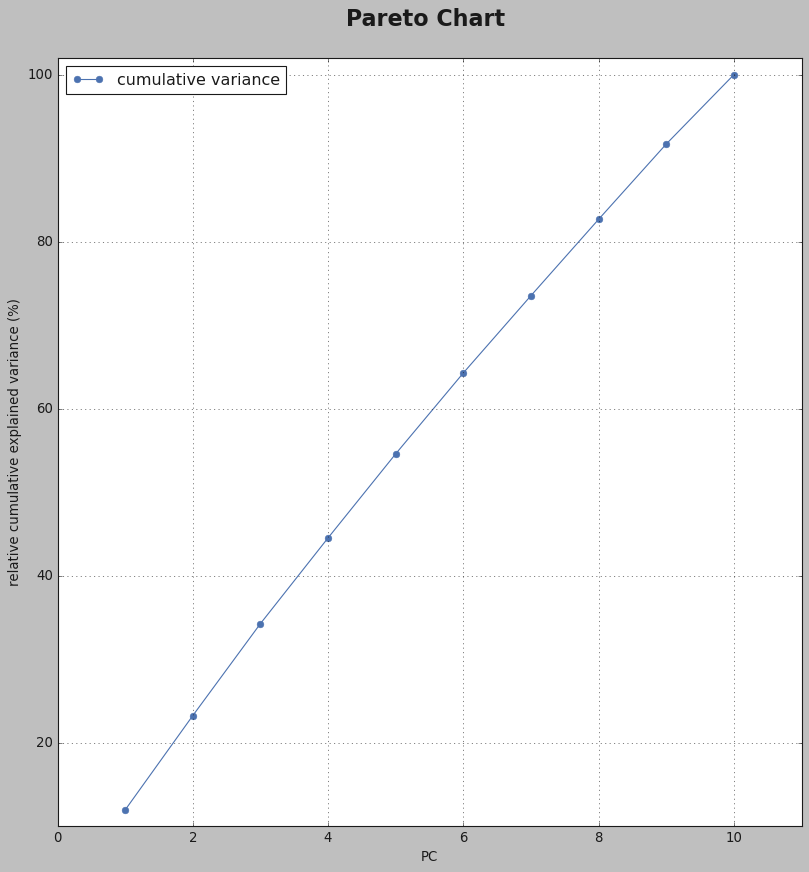

In [9]:
# get Pareto plot
util._plot_pareto(eigenvalues)

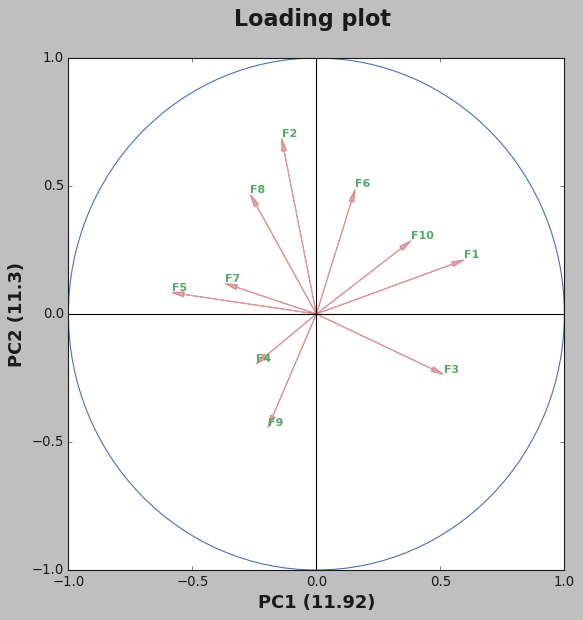

In [10]:
# plot loadings plot
util._plot_loading(eigenvalues, eigenvectors)

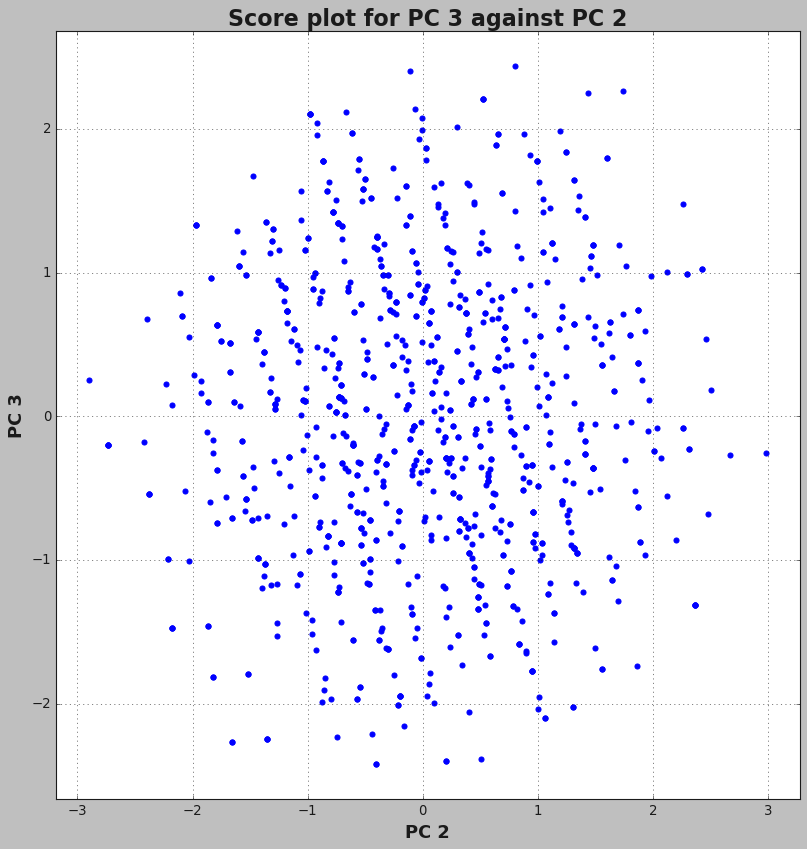

In [11]:
# plot score plot
util._plot_score(dat_transformed, 2, 3)

## Reduce dataset
___

In [12]:
dat_reduced = dat_transformed[:, 0:5]

## Find optimal cluster number k-mean clustering

Cluster number, k =  2
MSSE score:  4.634
Silhouette score:  0.149
Cluster number, k =  3
MSSE score:  4.129
Silhouette score:  0.137
Cluster number, k =  4
MSSE score:  3.689
Silhouette score:  0.146
Cluster number, k =  5
MSSE score:  3.362
Silhouette score:  0.154
Cluster number, k =  6
MSSE score:  3.128
Silhouette score:  0.153
Cluster number, k =  7
MSSE score:  2.91
Silhouette score:  0.159
Cluster number, k =  8
MSSE score:  2.752
Silhouette score:  0.16
Cluster number, k =  9
MSSE score:  2.624
Silhouette score:  0.159
Cluster number, k =  10
MSSE score:  2.416
Silhouette score:  0.175


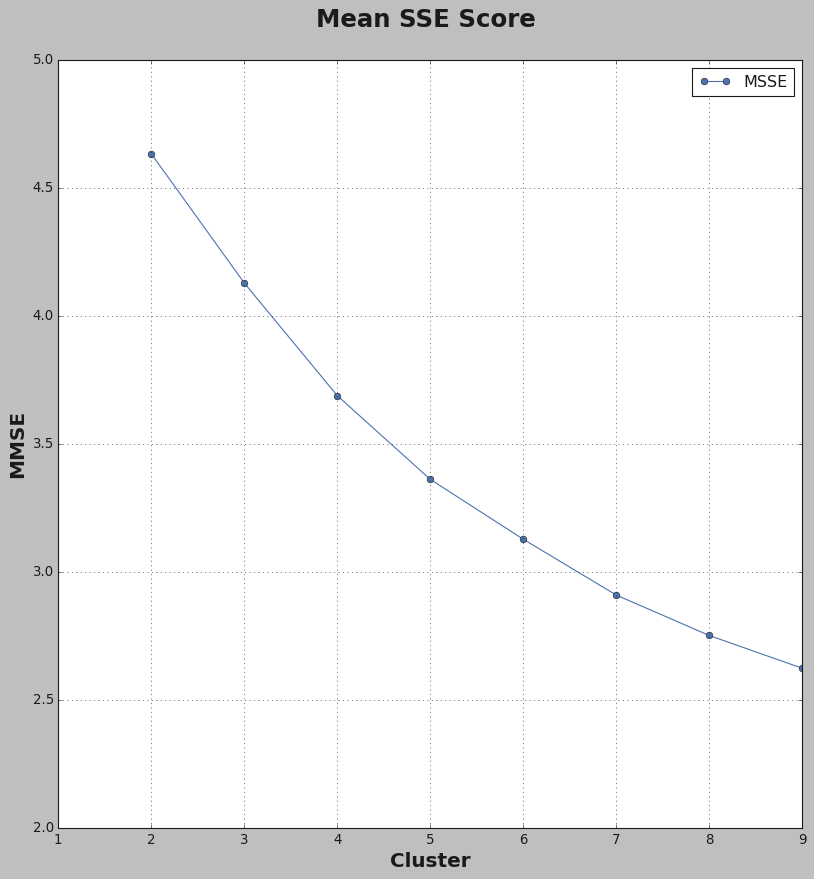

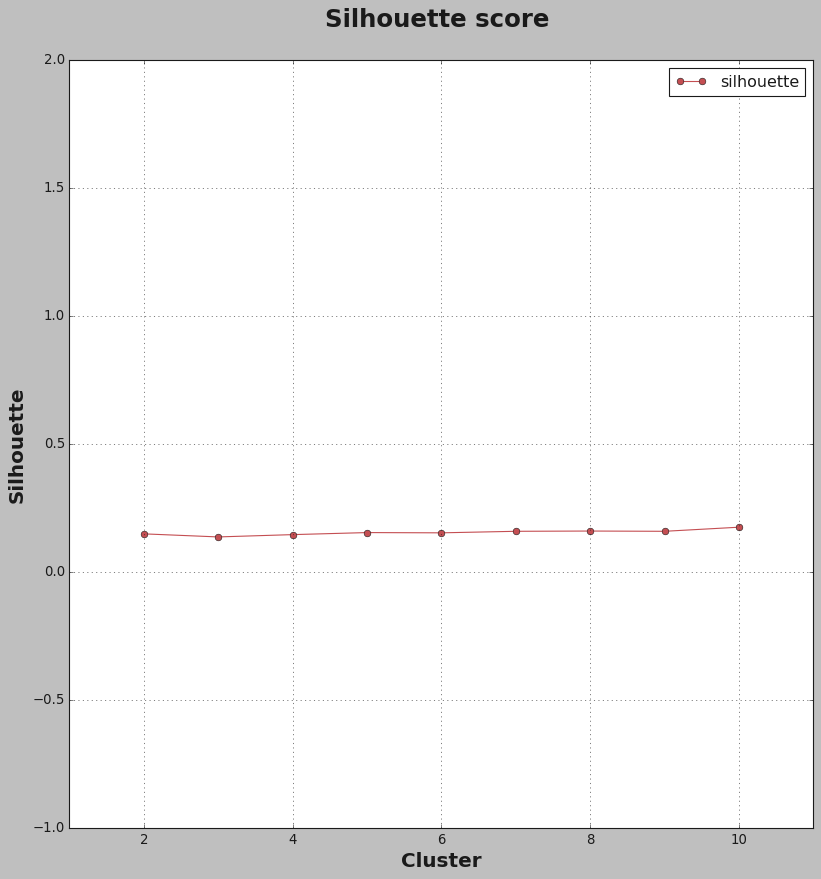

In [13]:
MMSE, silhouette = util._perform_kmean(dat_reduced)

## Fit k-mean clustering to data

In [14]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10,
               max_iter=500, random_state=42)
kmeans.fit(dat_reduced)

KMeans(max_iter=500, n_clusters=6, random_state=42)

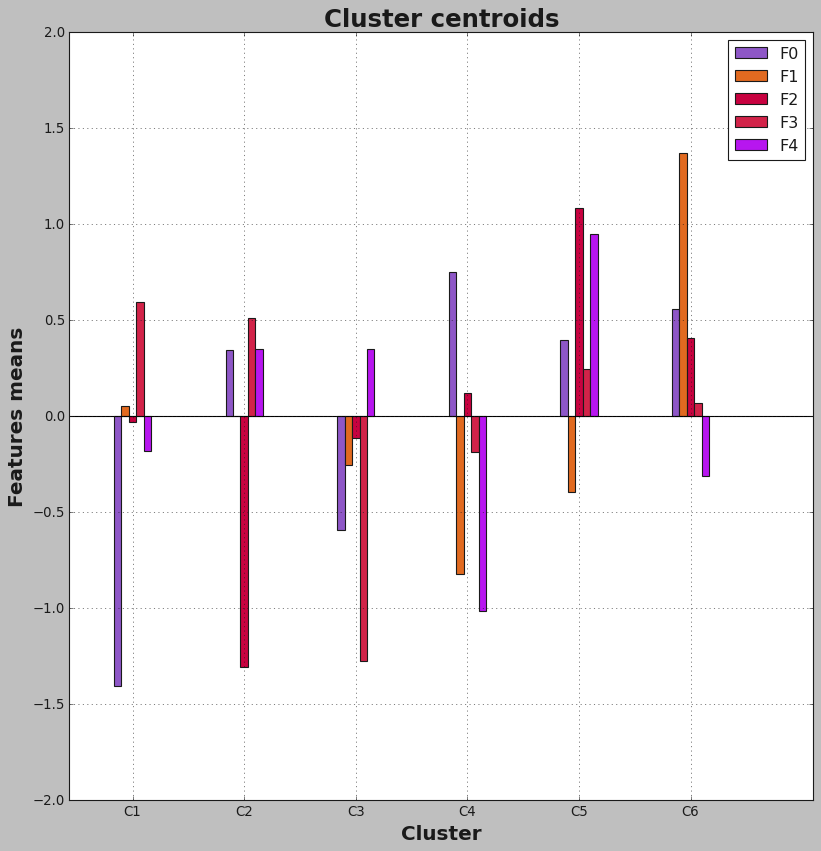

In [15]:
centroids = kmeans.cluster_centers_
util._plot_cluster_centroid(centroids)